<a href="https://colab.research.google.com/github/suryayesu/suryayesu/blob/main/Deep_learning_model_HouseLoanDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DESCRIPTION

For safe and secure lending experience, it's important to analyze the past data. In this project, you have to build a deep learning model to predict the chance of default for future loans using the historical data. As you will see, this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.

Objective: Create a model that predicts whether or not an applicant will be able to repay a loan using historical data.

Domain: Finance

Analysis to be done: Perform data preprocessing and build a deep learning prediction model.

Steps to be done: 

⦁    Load the dataset that is given to you
⦁    Check for null values in the dataset
⦁    Print percentage of default to payer of the dataset for the TARGET column
⦁    Balance the dataset if the data is imbalanced
⦁    Plot the balanced data or imbalanced data
⦁    Encode the columns that is required for the model
⦁    Calculate Sensitivity as a metrice
⦁    Calculate area under receiver operating characteristics curve


In [3]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!unzip gdrive/My\ Drive/file/loan_data.rar /content/drive/MyDrive/loan_data.rar

unzip:  cannot find or open gdrive/My Drive/file/loan_data.rar, gdrive/My Drive/file/loan_data.rar.zip or gdrive/My Drive/file/loan_data.rar.ZIP.


In [7]:
!unrar x /content/drive/MyDrive/loan_data.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/loan_data.rar

Extracting  loan_data.csv                                                 15% 31% 46% 62% 78% 93% 99%  OK 
All OK


In [8]:
loan_df = pd.read_csv('loan_data.csv')
loan_df.shape

(307511, 122)

**Display Top 5 rows of dataset in transpose form to understabd the features well**

In [9]:
loan_df.head().T

,0,1,2,3,4
SK_ID_CURR,100002,100003,100004,100006,100007
TARGET,1,0,0,0,0
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Revolving loans,Cash loans,Cash loans
CODE_GENDER,M,F,M,F,M
FLAG_OWN_CAR,N,N,Y,N,N
...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,0.0,0.0,0.0,NaN,0.0
AMT_REQ_CREDIT_BUREAU_WEEK,0.0,0.0,0.0,NaN,0.0
AMT_REQ_CREDIT_BUREAU_MON,0.0,0.0,0.0,NaN,0.0
AMT_REQ_CREDIT_BUREAU_QRT,0.0,0.0,0.0,NaN,0.0


In [10]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [11]:
pd.set_option("display.max_rows",None)
loan_df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [12]:
# converting object datatypes to numeric
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()

for col in loan_df.columns:
  if loan_df[col].dtype == 'object':
    loan_df[col] = label_encode.fit_transform(loan_df[col])


In [13]:
pd.reset_option('all')

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



/usr/local/lib/python3.7/dist-packages/pandas/_config/config.py:630: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  warnings.warn(d.msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/pandas/_config/config.py:630: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


**Check for null values in the dataset**

In [14]:
loan_df.head().T

,0,1,2,3,4
SK_ID_CURR,100002.0,100003.0,100004.0,100006.0,100007.0
TARGET,1.0,0.0,0.0,0.0,0.0
NAME_CONTRACT_TYPE,0.0,0.0,1.0,0.0,0.0
CODE_GENDER,1.0,0.0,1.0,0.0,1.0
FLAG_OWN_CAR,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,0.0,0.0,0.0,NaN,0.0
AMT_REQ_CREDIT_BUREAU_WEEK,0.0,0.0,0.0,NaN,0.0
AMT_REQ_CREDIT_BUREAU_MON,0.0,0.0,0.0,NaN,0.0
AMT_REQ_CREDIT_BUREAU_QRT,0.0,0.0,0.0,NaN,0.0


In [15]:
loan_df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

**Print percentage of default to payer of the dataset for the TARGET column**

In [16]:
loan_df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

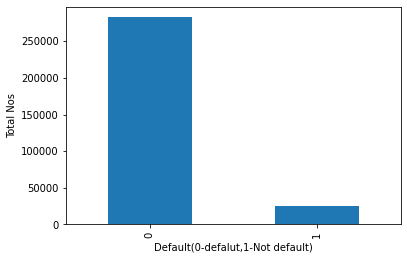

In [17]:
loan_df['TARGET'].value_counts().plot(kind='bar',xlabel ='Default(0-defalut,1-Not default)',ylabel = 'Total Nos');

In [18]:
print('Percentage of defaults is:',
      round(
          100*loan_df['TARGET'].value_counts()[1]/loan_df['TARGET'].value_counts().sum(),
          2),
      '%')

Percentage of defaults is: 8.07 %


**Balance the dataset if the data is imbalanced**

In [19]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_major = loan_df[(loan_df['TARGET']==0)] 
df_minor = loan_df[(loan_df['TARGET']==1)] 
# upsample minority class
df_minor_upsample = resample(df_minor, 
                                 replace=True,
                                 n_samples= 282686,
                                 random_state=101)

In [20]:
# Combine majority class with upsampled minority class
loan_df_upsampled = pd.concat([df_minor_upsample, df_major])

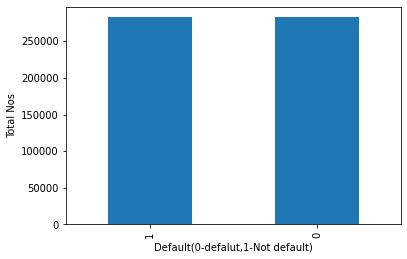

In [21]:
loan_df_upsampled['TARGET'].value_counts().plot(kind='bar',
                                      xlabel ='Default(0-defalut,1-Not default)',
                                      ylabel = 'Total Nos');

In [22]:
#shuffling of data
loan_df_upsampled.sample(frac=1)
loan_df_upsampled.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
161622,287367,1,0,1,0,1,2,202500.0,888840.0,37494.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
220908,355906,1,0,1,1,1,2,315000.0,712858.5,30330.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
218605,353263,1,0,0,1,1,0,225000.0,757597.5,40491.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,5.0
98841,214766,1,1,0,0,1,0,90000.0,202500.0,10125.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
70978,182319,1,0,0,0,1,0,146250.0,553806.0,30172.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
208969,342201,1,0,1,0,1,0,112500.0,328500.0,19980.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
278519,422692,1,0,0,0,1,1,112500.0,253737.0,25227.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
151587,275708,1,0,0,1,1,0,103500.0,566055.0,18387.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
252218,391834,1,0,0,0,0,0,225000.0,900000.0,45954.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
213645,347563,1,0,1,1,0,1,225000.0,450000.0,20979.0,...,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0


In [23]:
loan_df_final = loan_df_upsampled.fillna(0)

In [24]:
loan_df_final.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

In [25]:
X = loan_df_final.drop('TARGET',axis=1)
y = loan_df_final['TARGET']

In [26]:
X.drop('SK_ID_CURR',axis=1,inplace=True)
X.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
161622,0,1,0,1,2,202500.0,888840.0,37494.0,675000.0,6,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
220908,0,1,1,1,2,315000.0,712858.5,30330.0,576000.0,6,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
218605,0,0,1,1,0,225000.0,757597.5,40491.0,702000.0,6,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,5.0
98841,1,0,0,1,0,90000.0,202500.0,10125.0,202500.0,6,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
70978,0,0,0,1,0,146250.0,553806.0,30172.5,495000.0,6,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state=101,
                                                 test_size = 0.25)

In [28]:
X_train.shape,X_test.shape

((424029, 120), (141343, 120))

In [29]:
y_train.shape,y_test.shape

((424029,), (141343,))

Applying Scaling on the data

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
X_train_arr = np.asarray(X_train_scaled).astype(np.float32)
y_train_arr = np.asarray(y_train).astype(np.int)
X_test_arr = np.asarray(X_test_scaled).astype(np.float32)
y_test_arr = np.asarray(y_test).astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depreca

**Building a Neural network model for Binary classification.**

1.Calculate Sensitivity as a metrice

2.Calculate area under receiver operating characteristics
(ROC) curve

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Input

In [61]:
model = Sequential()
model.add(Input(shape=(120,)))
model.add(Dense(240,activation='relu'))
model.add(Dense(480,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(480,activation='relu'))
model.add(Dense(240,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall()])

In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 240)               29040     
                                                                 
 dense_6 (Dense)             (None, 480)               115680    
                                                                 
 dropout_1 (Dropout)         (None, 480)               0         
                                                                 
 dense_7 (Dense)             (None, 480)               230880    
                                                                 
 dense_8 (Dense)             (None, 240)               115440    
                                                                 
 dense_9 (Dense)             (None, 1)                 241       
                                                                 
Total params: 491,281
Trainable params: 491,281
Non-tr

In [63]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', 
                                      verbose=1, patience=20,
                                      min_delta=0.01)

training_history = model.fit(X_train_arr,y_train_arr,epochs =50,
                             validation_data=(X_test_arr,y_test_arr),
                             callbacks=[es])

Epoch 1/50
13251/13251 [==============================] - 72s 5ms/step - loss: 0.6056 - recall_1: 0.6823 - val_loss: 0.5908 - val_recall_1: 0.6866
Epoch 2/50
13251/13251 [==============================] - 68s 5ms/step - loss: 0.5773 - recall_1: 0.7274 - val_loss: 0.5607 - val_recall_1: 0.7569
Epoch 3/50
13251/13251 [==============================] - 79s 6ms/step - loss: 0.5460 - recall_1: 0.7767 - val_loss: 0.5309 - val_recall_1: 0.7975
Epoch 4/50
13251/13251 [==============================] - 58s 4ms/step - loss: 0.5140 - recall_1: 0.8157 - val_loss: 0.4951 - val_recall_1: 0.8376
Epoch 5/50
13251/13251 [==============================] - 57s 4ms/step - loss: 0.4844 - recall_1: 0.8413 - val_loss: 0.4682 - val_recall_1: 0.8841
Epoch 6/50
13251/13251 [==============================] - 61s 5ms/step - loss: 0.4589 - recall_1: 0.8589 - val_loss: 0.4361 - val_recall_1: 0.8707
Epoch 7/50
13251/13251 [==============================] - 57s 4ms/step - loss: 0.4365 - recall_1: 0.8714 - val_loss: 0

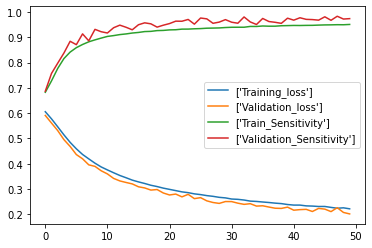

In [69]:
import matplotlib.pyplot as plt
plt.plot(training_history.history['loss'],label = ['Training_loss'])
plt.plot(training_history.history['val_loss'],label = ['Validation_loss'])

plt.plot(training_history.history['recall_1'],label = ['Train_Sensitivity'])
plt.plot(training_history.history['val_recall_1'],label = ['Validation_Sensitivity'])

plt.legend()
plt.show()

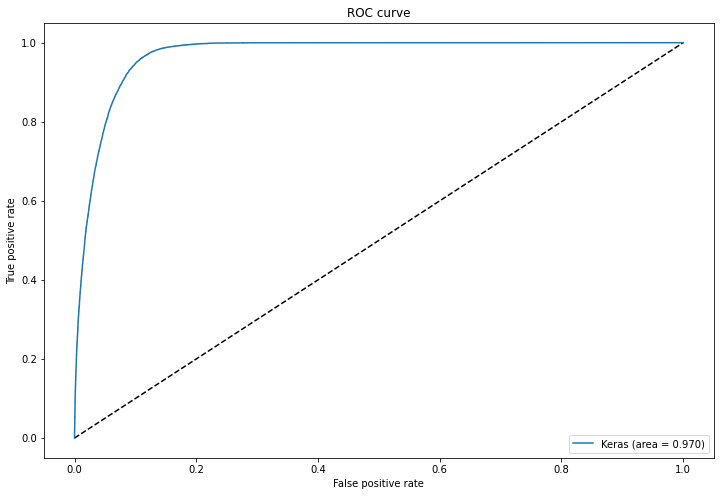

In [70]:
#plotting area ROC(Reciever Pperating Characteristics) curve

from sklearn.metrics import roc_curve
y_pred = model.predict(X_test_scaled).ravel()
FPR, TPR, threshold = roc_curve(y_test, y_pred)

from sklearn.metrics import auc
area_under_curve = auc(FPR, TPR)
plt.figure(figsize=(12,8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(FPR, TPR, label='Keras (area = {:.3f})'.format(area_under_curve))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
